In [1]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#opening the new csv file for our data
df = pd.read_csv('./data/Clean_Aviation.csv')

**Is there any correlation between weather and accidents?
Weather that produces most accidents**

  Compare with damage
    
    #Aircraft_damage

    
  Compare with injuries
    
	#Total_Fatal_Injuries
	#Total_Serious_Injuries
	#Total_Minor_Injuries
	#Total_Uninjured
    
    #Injury_severity

In [3]:
df.columns

Index(['Event_Id', 'Accident_Number', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_Damage', 'Make', 'Model',
       'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Phase_of_Flight', 'Report_Status', 'Make_Model'],
      dtype='object')

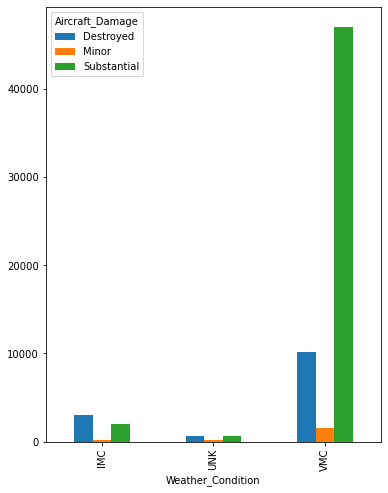

In [4]:
Weather_v_Damage = df[['Weather_Condition', 'Aircraft_Damage']]

Weather_v_Damage_count = Weather_v_Damage.value_counts()
Weather_v_Damage_count = Weather_v_Damage_count.unstack(level = 1)

Weather_v_Damage_count.drop(columns=['Unknown']).plot(kind='bar', figsize=(6,8),use_index = True)

new_col = df['Weather_Condition'].value_counts().values
Weather_v_Injuries = df.groupby('Weather_Condition')[['Total_Injuries', 'Total_Uninjured']].sum()
Weather_v_Injuries['Number_of_Accidents'] = new_col
Weather_v_Injuries['Injuries_per_Accident'] = Weather_v_Injuries['Total_Injuries'] / Weather_v_Injuries['Number_of_Accidents']
Weather_v_Injuries['Uninjuried_per_Accident'] = Weather_v_Injuries['Total_Uninjured'] / Weather_v_Injuries['Number_of_Accidents']

Weather_Injuries = Weather_v_Injuries[['Total_Injuries', 'Total_Uninjured']]
Weather_rate = Weather_v_Injuries[['Injuries_per_Accident','Uninjuried_per_Accident']].reset_index()

<AxesSubplot:xlabel='Weather_Condition'>

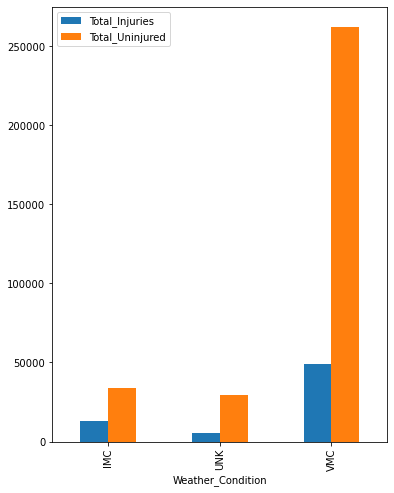

In [5]:
Weather_Injuries.plot(kind='bar', figsize=(6,8),use_index = True)

**Is there a correlation between engine type and accidents? Do accidents decrease with a certain engine type?**
	
    -Engine Type

	#Amateur_Built     - maybe drop ? filtering commercial, private,          
	#Number_of_Engines          
	#Engine_Type  


<AxesSubplot:xlabel='Engine_Type'>

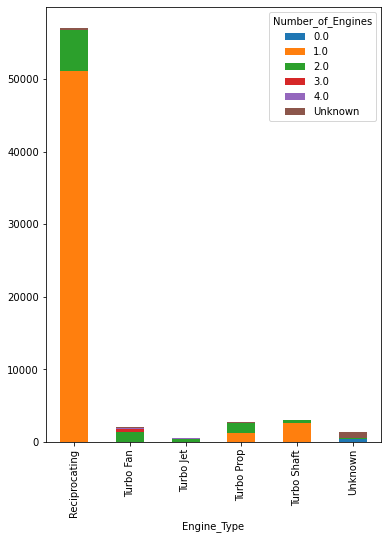

In [6]:
Engines = df.groupby(['Number_of_Engines', 'Engine_Type']).size().unstack(level = 0, fill_value = 0)
Engines.plot(kind='bar', stacked=True, figsize=(6,8), use_index = True)

In [15]:
top_makes = df['Make'].value_counts()[:20]

make_df = df[df['Make'].isin(top_makes.index)][['Make', 'Total_Fatal_Injuries', 'Total_Passengers']]

make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Fatal_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Fatal_Injuries', 'Total_Passengers'])

make_df['Survival_Rate'] = 1 - (make_df['Total_Fatal_Injuries']/ make_df['Total_Passengers'])
make_df = make_df.drop(columns= ['Total_Fatal_Injuries', 'Total_Passengers'])
make_df = make_df.unstack(fill_value=0)
make_df

<ipython-input-15-6777da5f789e>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Fatal_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Fatal_Injuries', 'Total_Passengers'])


Survival_Rate                                             \
Engine_Type       Reciprocating Turbo Fan Turbo Jet Turbo Prop Turbo Shaft   
Make                                                                         
Cessna                 0.849040  0.000000  0.000000   0.780702    0.000000   
Piper                  0.801378  0.000000  0.000000   0.000000    0.000000   
Beech                  0.731295  0.000000  0.000000   0.829086    0.000000   
Boeing                 0.000000  0.982997  0.984749   0.000000    0.000000   
Bell                   0.000000  0.000000  0.000000   0.000000    0.823121   
Airbus                 0.000000  0.976438  0.000000   0.000000    0.000000   
Mcdonnell douglas      0.000000  0.979742  0.000000   0.000000    0.000000   
Mooney                 0.746518  0.000000  0.000000   0.000000    0.000000   
Robinson               0.835772  0.000000  0.000000   0.000000    0.000000   
Bellanca               0.797378  0.000000  0.000000   0.000000    0.000000   
Douglas                0.000000  0.954667  0.871595   0.000000    0.000000   

                             
Engine_Type         Unknown  
Make                         
Cessna             0.537791  
Piper              0.000000  
Beech              0.000000  
Boeing             0.826864  
Bell               0.000000  
Airbus             0.726093  
Mcdonnell douglas  0.912319  
Mooney             0.000000  
Robinson           0.000000  
Bellanca           0.000000  
Douglas            0.612422

In [17]:
top_makes = df['Make'].value_counts()[:20]

make_df = df[df['Make'].isin(top_makes.index)][['Make', 'Total_Injuries', 'Total_Passengers']]

make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers']);

make_df['Survival_Rate'] = 1 - (make_df['Total_Injuries']/ make_df['Total_Passengers'])
make_df = make_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
make_df = make_df.unstack(fill_value=0)
make_df

<ipython-input-17-494423089df0>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers']);


Survival_Rate                                             \
Engine_Type       Reciprocating Turbo Fan Turbo Jet Turbo Prop Turbo Shaft   
Make                                                                         
Cessna                 0.633670  0.000000  0.000000   0.637959    0.000000   
Piper                  0.576463  0.000000  0.000000   0.000000    0.000000   
Boeing                 0.000000  0.962465  0.974429   0.000000    0.000000   
Beech                  0.518549  0.000000  0.000000   0.763518    0.000000   
Bell                   0.588181  0.000000  0.000000   0.000000    0.504787   
Mcdonnell douglas      0.000000  0.946808  0.000000   0.000000    0.000000   
Airbus                 0.000000  0.957867  0.000000   0.000000    0.000000   
Mooney                 0.501393  0.000000  0.000000   0.000000    0.000000   
Robinson               0.582520  0.000000  0.000000   0.000000    0.000000   
Bellanca               0.544696  0.000000  0.000000   0.000000    0.000000   
Grumman                0.631048  0.000000  0.000000   0.000000    0.000000   
Aerospatiale           0.000000  0.000000  0.000000   0.000000    0.482234   
Hughes                 0.000000  0.000000  0.000000   0.000000    0.596491   

                             
Engine_Type         Unknown  
Make                         
Cessna             0.350291  
Piper              0.000000  
Boeing             0.715648  
Beech              0.000000  
Bell               0.000000  
Mcdonnell douglas  0.779022  
Airbus             0.000000  
Mooney             0.000000  
Robinson           0.000000  
Bellanca           0.000000  
Grumman            0.000000  
Aerospatiale       0.000000  
Hughes             0.000000

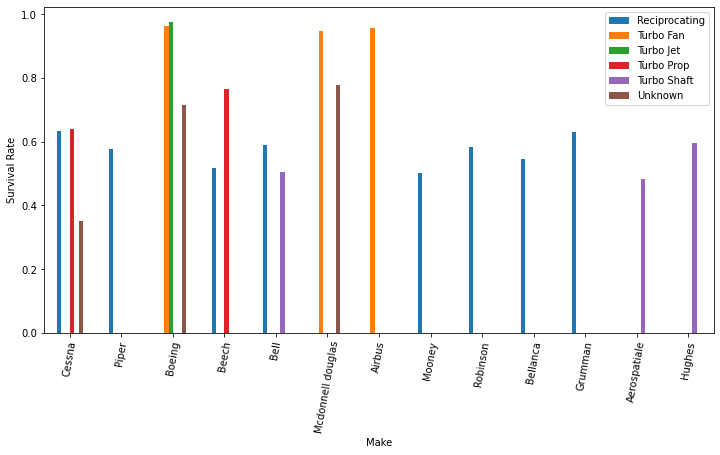

In [8]:
fig, ax = plt.subplots()

make_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax)
ax.legend(['Reciprocating',
'Turbo Fan',
'Turbo Jet',
'Turbo Prop',
'Turbo Shaft',
'Unknown'])
ax.set_ylabel('Survival Rate');

In [9]:
df[['Make_Model','Engine_Type']].value_counts()[:20]

Make_Model       Engine_Type  
Cessna 152       Reciprocating    2322
Cessna 172       Reciprocating    1614
Cessna 172N      Reciprocating    1136
Piper PA-28-140  Reciprocating     893
Cessna 150       Reciprocating     787
Cessna 172M      Reciprocating     772
Cessna 172P      Reciprocating     674
Cessna 180       Reciprocating     605
Cessna 182       Reciprocating     590
Cessna 150M      Reciprocating     580
Piper PA-18      Reciprocating     565
Piper PA-28-180  Reciprocating     561
Piper PA-18-150  Reciprocating     560
Piper PA-28-161  Reciprocating     550
Piper PA-28-181  Reciprocating     512
Bell 206B        Turbo Shaft       473
Piper PA-38-112  Reciprocating     459
Cessna 150L      Reciprocating     450
Cessna 140       Reciprocating     388
Cessna 170B      Reciprocating     381
dtype: int64

Most of the top crashes are related with a planes with reciprocating engine. Only the model Bell 206B has a turbo shaft engine

In [18]:
top_models = df[['Make_Model']].value_counts()[:20]

model_df = df[df['Make_Model'].isin(top_models.index)][['Make', 'Total_Fatal_Injuries', 'Total_Passengers']]
model_df

model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Fatal_Injuries', 'Total_Passengers'].sum().nlargest(20, 
    columns=['Total_Fatal_Injuries', 'Total_Passengers'])
model_df

model_df['Survival_Rate'] = 1 - (model_df['Total_Fatal_Injuries']/ model_df['Total_Passengers'])
model_df = model_df.drop(columns= ['Total_Fatal_Injuries', 'Total_Passengers'])
model_df

<ipython-input-18-9cee4a68c148>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Fatal_Injuries', 'Total_Passengers'].sum().nlargest(20,


,Survival_Rate
Make_Model,
Boeing 737-200,0.847127
Airbus A320,0.814344
Cessna 172N,0.822545
Cessna 152,0.890229
Piper PA-28-181,0.716952
Beech A36,0.677625
Piper PA-28-140,0.829186
Cessna 172,0.910974
Boeing 747-121,0.808782


<ipython-input-19-696659c4ee36>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_df.index, rotation=80)


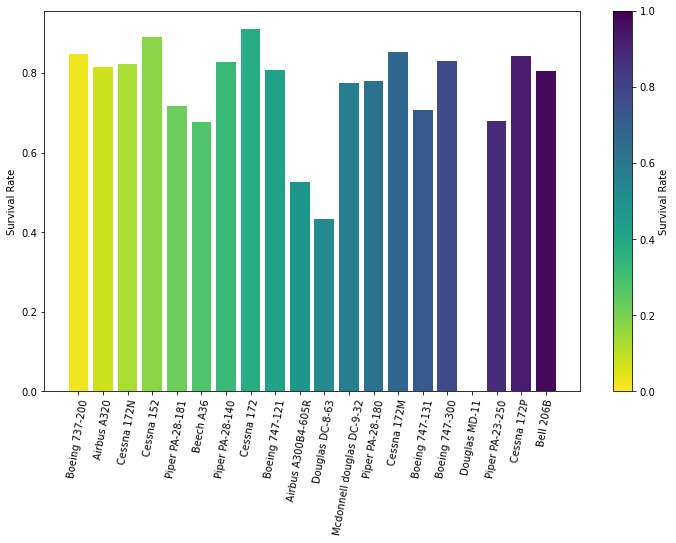

In [19]:
fig, ax = plt.subplots(figsize=(12,7))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(0,1, len(model_df) + 1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(model_df))]

# model_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax,legend=False, color =colors)
# ax.set_ylabel('Survival Rate');

for index, (make, row) in enumerate(model_df.iterrows()):
    color = colors[index]
    ax.bar(make, row['Survival_Rate'], color = color)

ax.set_xticklabels(model_df.index, rotation=80)
ax.set_ylabel('Survival Rate')
sm = plt.cm.ScalarMappable(cmap = color_map, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Survival Rate')